In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
dt = pd.read_csv('..\data\\15.eq_building_damage.csv')

In [3]:
dt

,Unnamed: 0,struct_typ,occ_type,year_built,no_stories,magnitude,distance,meandamage
0,0,URM,RES1,1946,1.0,5,8.758655,0.13637
1,1,W1,COM1,1946,1.0,5,8.750071,0.13302
2,2,URM,RES1,19830429,1.0,5,8.761617,0.18070
3,3,URM,RES1,1954,1.0,5,8.767489,0.14398
4,4,URM,RES1,19821126,1.0,5,8.764526,0.17911
...,...,...,...,...,...,...,...,...
11087,11766,S1,COM2,20050503,2.0,5,8.783250,0.09335
11088,11767,S1,COM8,20030828,2.0,5,8.720425,0.07537
11089,11768,C4,RES1,20010913,2.0,5,8.882139,0.21389
11090,11769,S1,COM2,19950913,1.0,5,8.909023,0.10686


In [4]:
dt = dt.drop('Unnamed: 0',axis = 1)

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11092 entries, 0 to 11091
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   struct_typ  11092 non-null  object 
 1   occ_type    11092 non-null  object 
 2   year_built  11092 non-null  int64  
 3   no_stories  11092 non-null  float64
 4   magnitude   11092 non-null  int64  
 5   distance    11092 non-null  float64
 6   meandamage  11092 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 606.7+ KB


In [6]:
dt.describe()

,year_built,no_stories,magnitude,distance,meandamage
count,1.109200e+04,11092.000000,11092.0,11092.000000,11092.000000
mean,1.466605e+07,1.868193,5.0,6.667361,0.168845
std,8.825379e+06,2.526593,0.0,2.000104,0.043405
min,1.850000e+03,0.000000,5.0,0.083175,0.047460
25%,1.989000e+03,1.000000,5.0,5.168971,0.127950
50%,1.994060e+07,1.000000,5.0,7.161111,0.174055
75%,2.004061e+07,2.000000,5.0,8.067160,0.205077
max,2.017081e+07,30.000000,5.0,11.716949,0.249970


In [7]:
def delete_mm_dd(date):
    if len(str(date)) > 4:
        return int(str(date)[:4])
    else:
        return date
dt['year_built'] = dt['year_built'].apply(delete_mm_dd)

In [8]:
dt

,struct_typ,occ_type,year_built,no_stories,magnitude,distance,meandamage
0,URM,RES1,1946,1.0,5,8.758655,0.13637
1,W1,COM1,1946,1.0,5,8.750071,0.13302
2,URM,RES1,1983,1.0,5,8.761617,0.18070
3,URM,RES1,1954,1.0,5,8.767489,0.14398
4,URM,RES1,1982,1.0,5,8.764526,0.17911
...,...,...,...,...,...,...,...
11087,S1,COM2,2005,2.0,5,8.783250,0.09335
11088,S1,COM8,2003,2.0,5,8.720425,0.07537
11089,C4,RES1,2001,2.0,5,8.882139,0.21389
11090,S1,COM2,1995,1.0,5,8.909023,0.10686


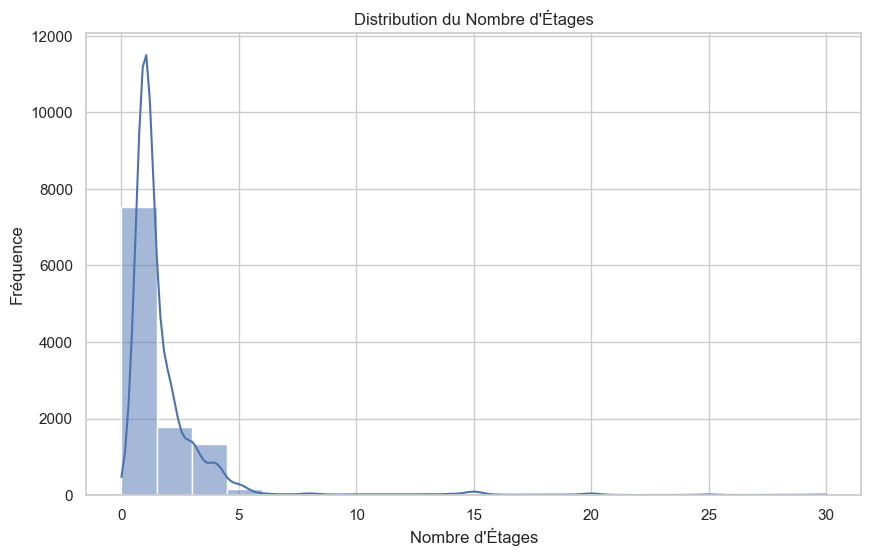

In [9]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.histplot(dt['no_stories'], bins=20, kde=True)
plt.title('Distribution du Nombre d\'Étages')
plt.xlabel('Nombre d\'Étages')
plt.ylabel('Fréquence')
plt.show()

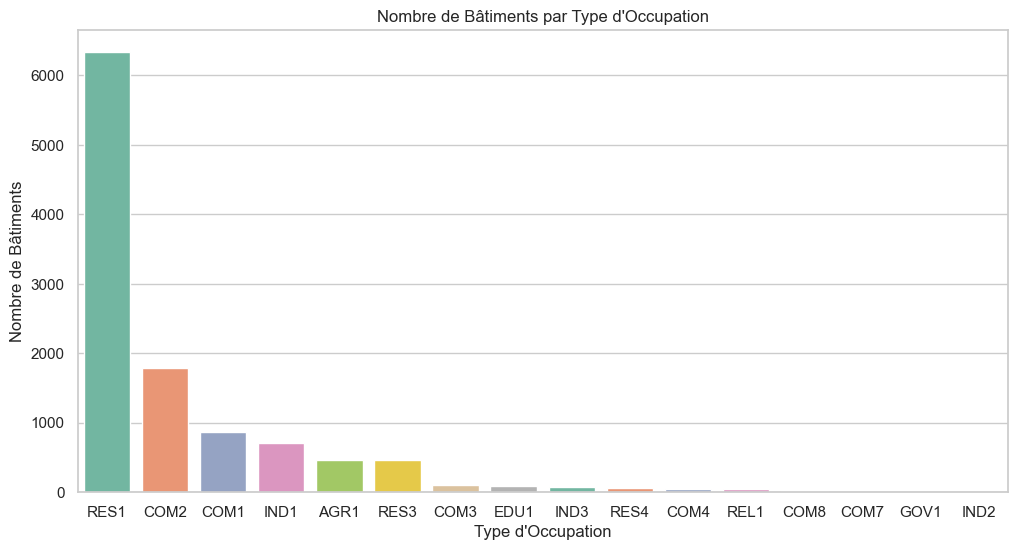

In [10]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.countplot(x='occ_type', data=dt, order=dt['occ_type'].value_counts().index,palette='Set2')
plt.title('Nombre de Bâtiments par Type d\'Occupation')
plt.xlabel('Type d\'Occupation')
plt.ylabel('Nombre de Bâtiments')
plt.show()

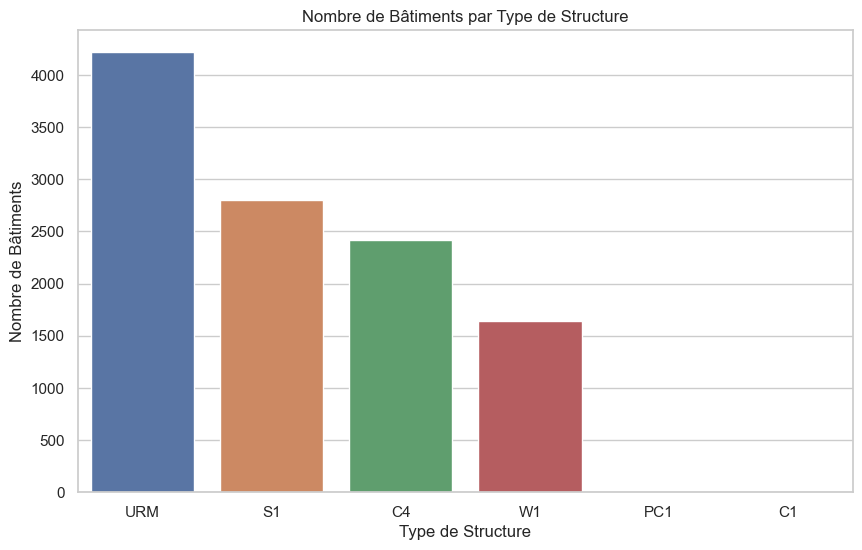

In [11]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.countplot(x='struct_typ', data=dt, order=dt['struct_typ'].value_counts().index)
plt.title('Nombre de Bâtiments par Type de Structure')
plt.xlabel('Type de Structure')
plt.ylabel('Nombre de Bâtiments')
plt.show()

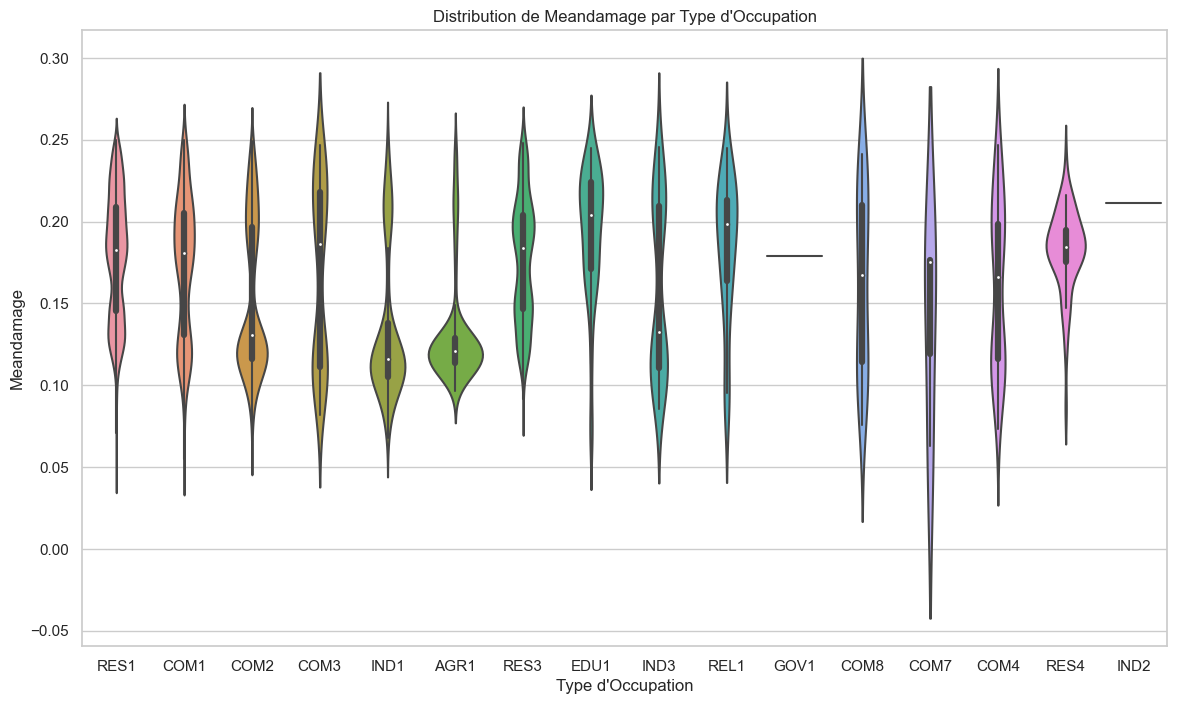

In [12]:
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")
sns.violinplot(x='occ_type', y='meandamage', data=dt)
plt.title('Distribution de Meandamage par Type d\'Occupation')
plt.xlabel('Type d\'Occupation')
plt.ylabel('Meandamage')
plt.show()

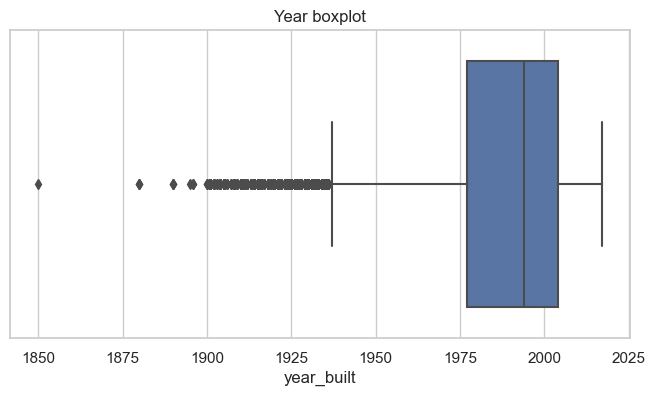

In [13]:
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")
sns.boxplot(dt['year_built'])
plt.title('Year boxplot')

plt.show()

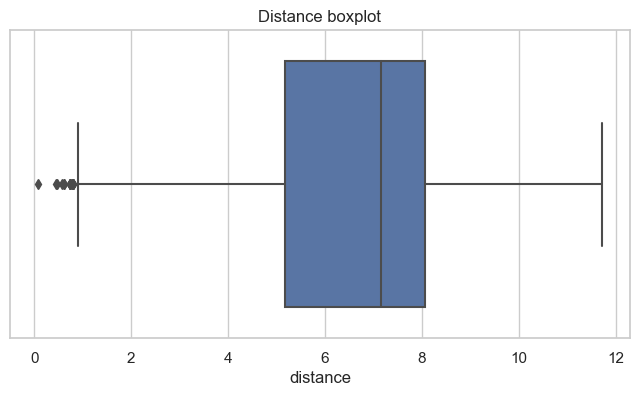

In [14]:
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")
sns.boxplot(dt['distance'])
plt.title('Distance boxplot')

plt.show()

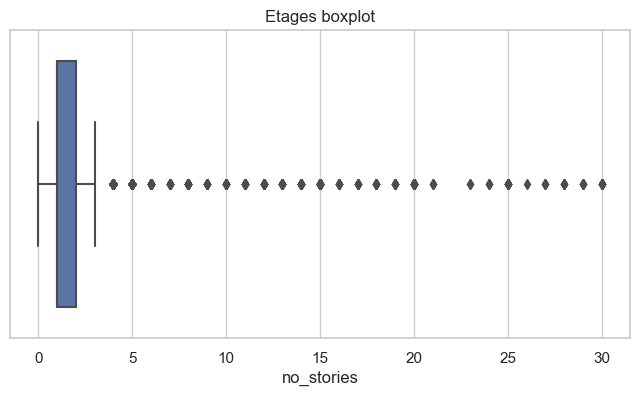

In [15]:
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")
sns.boxplot(dt['no_stories'])
plt.title('Etages boxplot')

plt.show()

In [16]:
dt = dt.drop('magnitude',axis = 1)

In [17]:
dt

,struct_typ,occ_type,year_built,no_stories,distance,meandamage
0,URM,RES1,1946,1.0,8.758655,0.13637
1,W1,COM1,1946,1.0,8.750071,0.13302
2,URM,RES1,1983,1.0,8.761617,0.18070
3,URM,RES1,1954,1.0,8.767489,0.14398
4,URM,RES1,1982,1.0,8.764526,0.17911
...,...,...,...,...,...,...
11087,S1,COM2,2005,2.0,8.783250,0.09335
11088,S1,COM8,2003,2.0,8.720425,0.07537
11089,C4,RES1,2001,2.0,8.882139,0.21389
11090,S1,COM2,1995,1.0,8.909023,0.10686


In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['struct_typ','occ_type']:
    dt[col] = le.fit_transform(dt[col])

In [19]:
dt

,struct_typ,occ_type,year_built,no_stories,distance,meandamage
0,4,13,1946,1.0,8.758655,0.13637
1,5,1,1946,1.0,8.750071,0.13302
2,4,13,1983,1.0,8.761617,0.18070
3,4,13,1954,1.0,8.767489,0.14398
4,4,13,1982,1.0,8.764526,0.17911
...,...,...,...,...,...,...
11087,3,2,2005,2.0,8.783250,0.09335
11088,3,6,2003,2.0,8.720425,0.07537
11089,1,13,2001,2.0,8.882139,0.21389
11090,3,2,1995,1.0,8.909023,0.10686


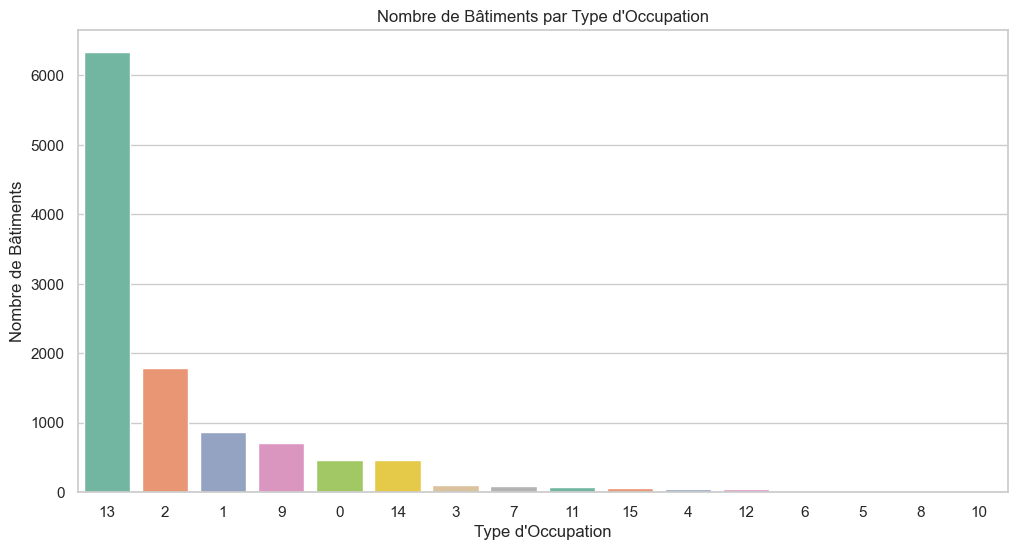

In [20]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.countplot(x='occ_type', data=dt, order=dt['occ_type'].value_counts().index,palette='Set2')
plt.title('Nombre de Bâtiments par Type d\'Occupation')
plt.xlabel('Type d\'Occupation')
plt.ylabel('Nombre de Bâtiments')
plt.show()

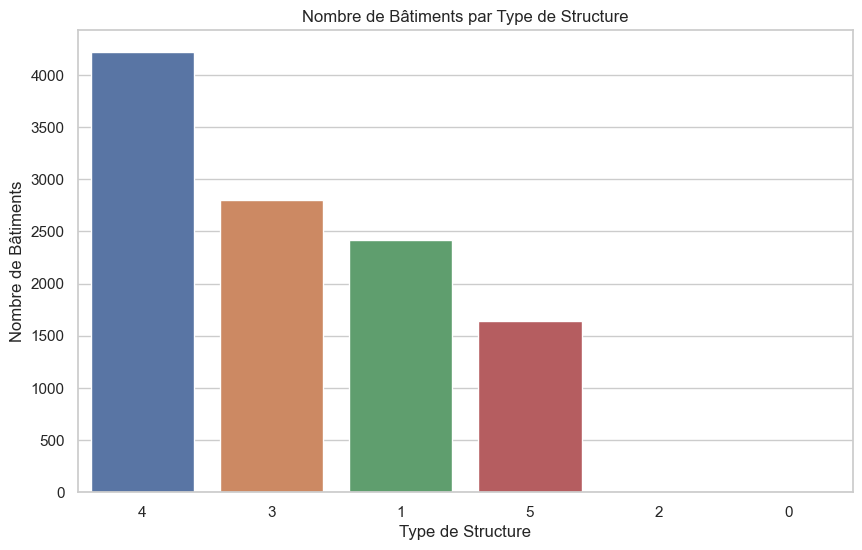

In [21]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.countplot(x='struct_typ', data=dt, order=dt['struct_typ'].value_counts().index)
plt.title('Nombre de Bâtiments par Type de Structure')
plt.xlabel('Type de Structure')
plt.ylabel('Nombre de Bâtiments')
plt.show()

In [22]:
dt

,struct_typ,occ_type,year_built,no_stories,distance,meandamage
0,4,13,1946,1.0,8.758655,0.13637
1,5,1,1946,1.0,8.750071,0.13302
2,4,13,1983,1.0,8.761617,0.18070
3,4,13,1954,1.0,8.767489,0.14398
4,4,13,1982,1.0,8.764526,0.17911
...,...,...,...,...,...,...
11087,3,2,2005,2.0,8.783250,0.09335
11088,3,6,2003,2.0,8.720425,0.07537
11089,1,13,2001,2.0,8.882139,0.21389
11090,3,2,1995,1.0,8.909023,0.10686


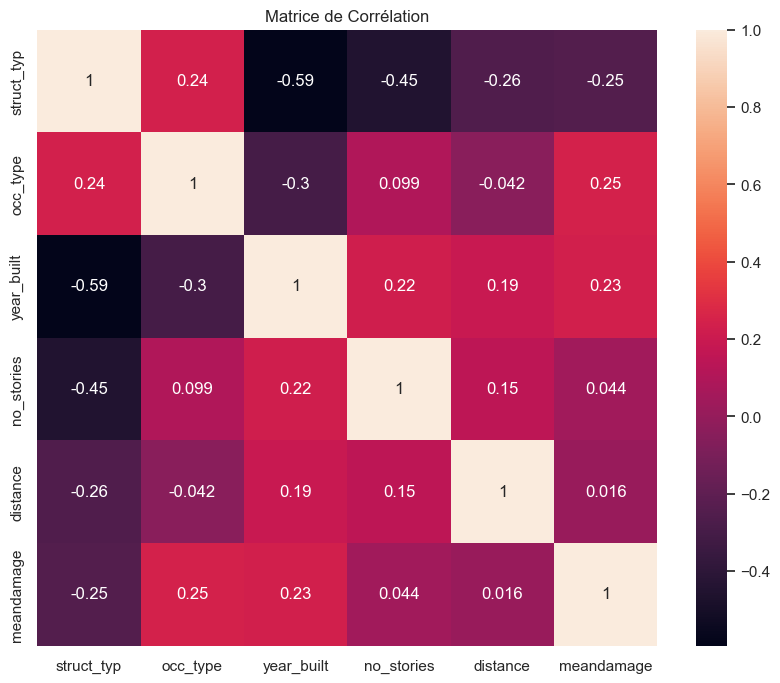

In [23]:
correlation_matrix = dt.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,annot = True)
plt.title('Matrice de Corrélation')
plt.show()

In [24]:
dt_corr = dt.drop(['no_stories','distance','year_built'],axis = 1)

In [25]:
X = dt_corr.drop('meandamage',axis = 1)
y = dt_corr['meandamage']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import mlflow
import mlflow.sklearn
from sklearn.model_selection import GridSearchCV

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_mse = {}
model_r2 = {}

In [27]:
with mlflow.start_run():
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    model_mse['Linear Regression'] = mse
    model_r2['Linear Regression'] = r2
    
    mlflow.log_param("model", "Linear Regression")
    mlflow.log_params({"normalize": True})
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("r2", r2)
    mlflow.sklearn.log_model(model, "linear_regression_model")

In [28]:
with mlflow.start_run():
    dt_regressor = DecisionTreeRegressor(random_state=42)
    dt_regressor.fit(X_train, y_train)
    y_pred = dt_regressor.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    model_mse['Decision Tree'] = mse
    model_r2['Decision Tree'] = r2
    
    mlflow.log_param("model", "Decision Tree")
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("r2", r2)
    mlflow.sklearn.log_model(dt_regressor, "decision_tree_model")

In [29]:
with mlflow.start_run():
    xgb_regressor = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
    
    param_grid = {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
    
    grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    
    xgb_regressor_best = grid_search.best_estimator_
    
    mlflow.log_params(grid_search.best_params_)
    
    y_pred = xgb_regressor_best.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    model_mse['XGBoost'] = mse
    model_r2['XGBoost'] = r2
    
    mlflow.log_param("model", "XGBoost")
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("r2", r2)
    mlflow.sklearn.log_model(xgb_regressor_best, "xgboost_model")

In [30]:
for model_name, mse_value in model_mse.items():
    print(f"{model_name} Mean Squared Error: {mse_value}")

for model_name, r2_value in model_r2.items():
    print(f"{model_name} R2 Score: {r2_value}")

Linear Regression Mean Squared Error: 0.0015448211906079969
Decision Tree Mean Squared Error: 0.0005254521051454522
XGBoost Mean Squared Error: 0.0005258170354990302
Linear Regression R2 Score: 0.18235223641127052
Decision Tree R2 Score: 0.7218870758265058
XGBoost R2 Score: 0.7216939243541654


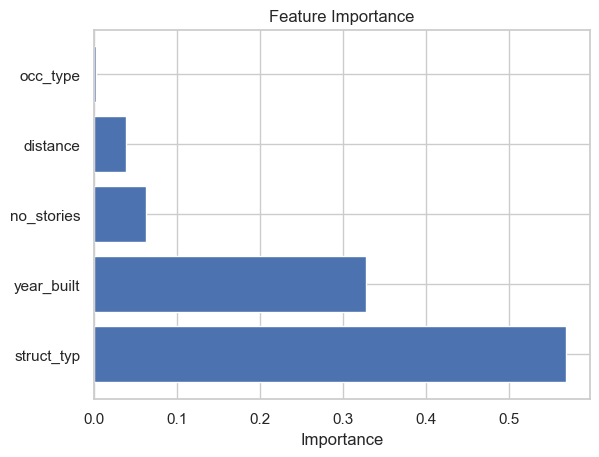

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X = dt.drop('meandamage',axis = 1)
y = dt['meandamage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


In [37]:
dt_detr = dt.drop(['occ_type','distance'],axis = 1)

In [38]:
X = dt_detr.drop('meandamage',axis = 1)
y = dt_detr['meandamage']

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import mlflow
import mlflow.sklearn
from sklearn.model_selection import GridSearchCV

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_mse = {}
model_r2 = {}

In [40]:
with mlflow.start_run():
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    model_mse['Linear Regression'] = mse
    model_r2['Linear Regression'] = r2
    
    mlflow.log_param("model", "Linear Regression")
    mlflow.log_params({"normalize": True})
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("r2", r2)
    mlflow.sklearn.log_model(model, "linear_regression_model")

In [41]:
with mlflow.start_run():
    dt_regressor = DecisionTreeRegressor(random_state=42)
    dt_regressor.fit(X_train, y_train)
    y_pred = dt_regressor.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    model_mse['Decision Tree'] = mse
    model_r2['Decision Tree'] = r2
    
    mlflow.log_param("model", "Decision Tree")
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("r2", r2)
    mlflow.sklearn.log_model(dt_regressor, "decision_tree_model")

In [42]:
with mlflow.start_run():
    xgb_regressor = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
    
    param_grid = {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
    
    grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    
    xgb_regressor_best = grid_search.best_estimator_
    
    mlflow.log_params(grid_search.best_params_)
    
    y_pred = xgb_regressor_best.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    model_mse['XGBoost'] = mse
    model_r2['XGBoost'] = r2
    
    mlflow.log_param("model", "XGBoost")
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("r2", r2)
    mlflow.sklearn.log_model(xgb_regressor_best, "xgboost_model")

In [43]:
for model_name, mse_value in model_mse.items():
    print(f"{model_name} Mean Squared Error: {mse_value}")

for model_name, r2_value in model_r2.items():
    print(f"{model_name} R2 Score: {r2_value}")

Linear Regression Mean Squared Error: 0.0017326109166814216
Decision Tree Mean Squared Error: 9.036992160812998e-05
XGBoost Mean Squared Error: 8.248651323804592e-05
Linear Regression R2 Score: 0.08295830623839107
Decision Tree R2 Score: 0.9521687268741471
XGBoost R2 Score: 0.9563412817707556


In [45]:
dt_detr

,struct_typ,year_built,no_stories,meandamage
0,4,1946,1.0,0.13637
1,5,1946,1.0,0.13302
2,4,1983,1.0,0.18070
3,4,1954,1.0,0.14398
4,4,1982,1.0,0.17911
...,...,...,...,...
11087,3,2005,2.0,0.09335
11088,3,2003,2.0,0.07537
11089,1,2001,2.0,0.21389
11090,3,1995,1.0,0.10686
